In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
galton = Table.read_table('galton.csv')

In [3]:
heights = Table().with_column('MidParent', galton.column('midparentHeight'), 'Child', galton.column('childHeight'))

In [4]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


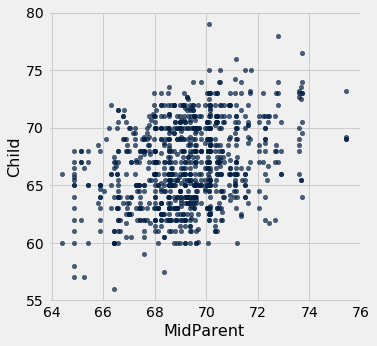

In [5]:
heights.scatter('MidParent')

In [6]:
#predict the child height for future families

def predict_child(x):
    '''x is a column from a table with height values of parents'''
    chosen = heights.where('MidParent', are.between(x - 0.5, x + 0.5)) #creates a table
    return np.average(chosen.column('Child'))
    

In [7]:
predictions = heights.apply(predict_child, 'MidParent')

In [8]:
heights = heights.with_column(
'Original Prediction', predictions)

In [9]:
heights

MidParent,Child,Original Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


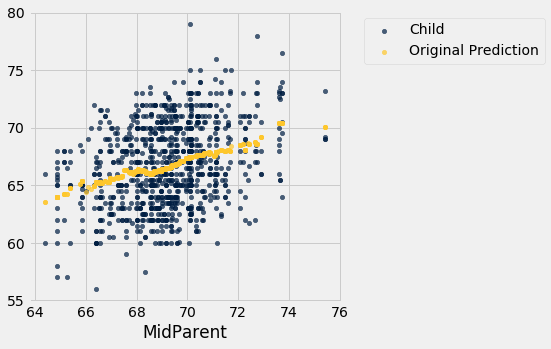

In [10]:
heights.scatter('MidParent') # the yelow line is a regression line

# Equation of the regression line

In [11]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, label_x, label_y):
    x_su = standard_units(t.column(label_x))
    y_su = standard_units(t.column(label_y))
    return np.average(x_su * y_su)

def slope(t, label_x, label_y):#it matter which is given(x) and which is predicted (y)
    r = correlation(t, label_x, label_y)
    return r * np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y): #rules above apply here aswell
    a = slope(t, label_x, label_y)
    return np.average(t.column(label_y)) - a * np.average(t.column(label_x))

In [12]:
heights

MidParent,Child,Original Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


In [13]:
galton_slope = slope(heights, 'MidParent', 'Child')
intercept_galton = intercept(heights, 'MidParent', 'Child')

In [14]:
galton_slope, intercept_galton

(0.637360896969479, 22.63624054958975)

In [15]:
heights.take(123) #takes the row 123 from the tabel

MidParent,Child,Original Prediction
69.48,71.5,66.7588


In [16]:
#making a prediction based on the sope and on the intercept above
prediction_123 = galton_slope * 69.48 + intercept_galton

In [17]:
prediction_123

66.92007567102915

In [18]:
def fitted_values(t, label_x, label_y): #fitted vaues = predicted values
    a = slope(t, label_x, label_y)
    b = intercept(t, label_x, label_y)
    return a * t.column(label_x) + b

In [19]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')

In [20]:
heights = heights.with_column('Regression Predictions', regression_predictions)

In [21]:
heights

MidParent,Child,Original Prediction,Regression Predictions
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


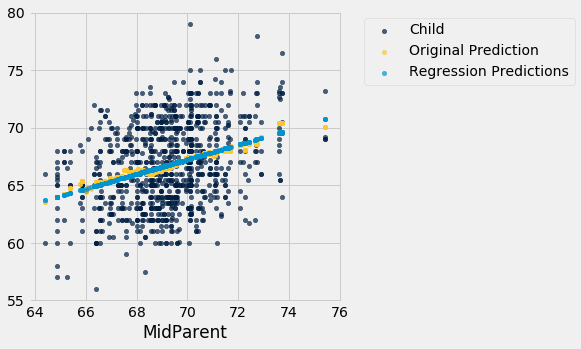

In [22]:
heights.scatter('MidParent') #makes the midparent on the X axis and the other three columns on the y axis

In [24]:
little_women = Table.read_table('little_women.csv')

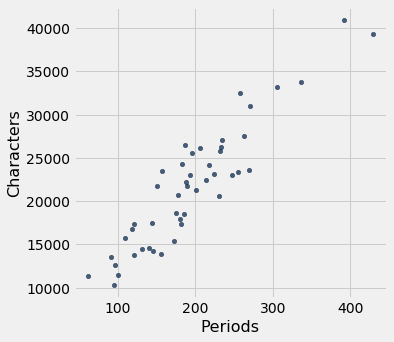

In [25]:
little_women.scatter(1,0) #each dot is a chapter in the book, 0 and 1 are the indices of the columns in the table

In [26]:
correlation_little_women = correlation(little_women, 1, 0)
correlation_little_women

0.9229576895854816

In [27]:
slope_little_women = slope(little_women, 1, 0)
intercept_little_women = intercept(little_women, 1, 0)
slope_little_women, intercept_little_women



(86.97784125829821, 4744.784796574928)

In [28]:
def linear_fit(t, label_x, label_y):
    a = slope(t, label_x, label_y)
    b = intercept(t, label_x, label_y)
    return a * t.column(label_x) + b

In [29]:
little_women_fitted = little_women.with_column('Fitted values', linear_fit(little_women, 1, 0))

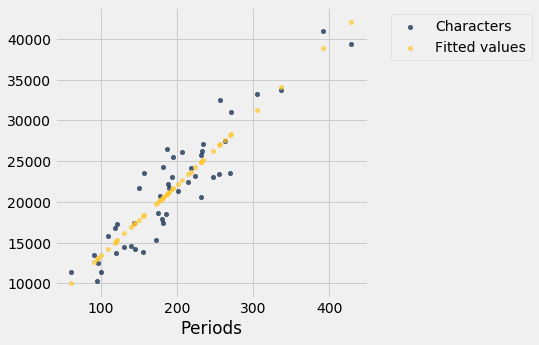

In [30]:
little_women_fitted.scatter(1) #shows the predicted average number of characters that you woud expect for chapter in golden and the real values (the blue ones)

# Squared Error

In [31]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'characters per period')
    print('Intercept:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     50 characters per period
Intercept: 1000 characters


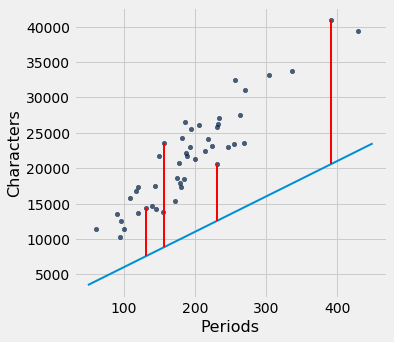

In [32]:
lw_errors(50, 1000)

Slope:     -50 characters per period
Intercept: 20000 characters


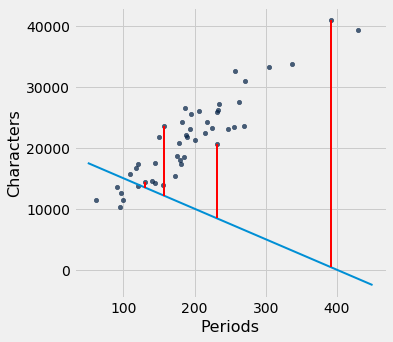

In [33]:
lw_errors(-50, 20000)

In [34]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    predicted = slope * x + intercept
    mse = np.mean((y - predicted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Slope:     50 characters per period
Intercept: 10000 characters
Root mean squared error: 4322.167831766537


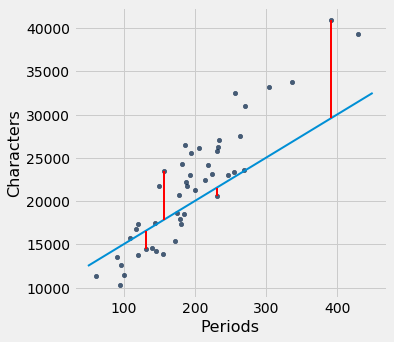

In [35]:
lw_rmse(50, 10000)

Slope:     -50 characters per period
Intercept: 20000 characters
Root mean squared error: 15556.958991519832


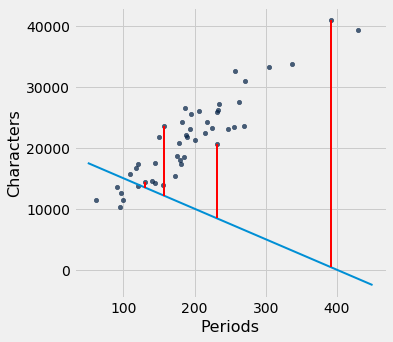

In [36]:
lw_rmse(-50, 20000)

Slope:     90 characters per period
Intercept: 4000 characters
Root mean squared error: 2715.5391063834586


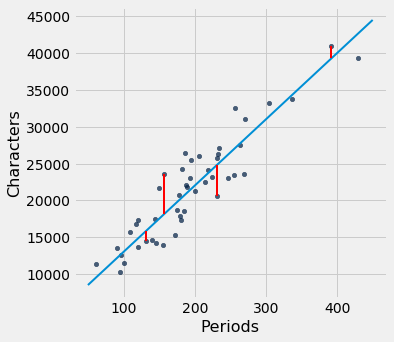

In [37]:
lw_rmse(90, 4000)

Slope:     0.0 characters per period
Intercept: -18.0 characters
Root mean squared error: 22811.074565719126


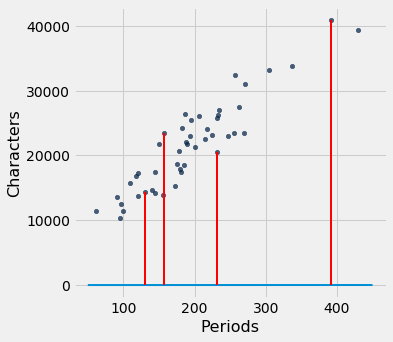

In [38]:
lw_rmse(slope(little_women, 0, 1), intercept(little_women, 0, 1))

# Least squares

In [39]:
def f(x):
    return (x - 3) ** 2 + 1

In [40]:
[f(1), f(2), f(3), f(4), f(5)]

[5, 2, 1, 2, 5]

In [41]:
minimize(f)

2.999999999968361

In [42]:
f(minimize(f))

1.0

In [43]:
f(3)

1

In [44]:
f(3.1)

1.01

In [45]:
f(2.9)

1.01

In [46]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column(0)
    y = little_women.column(1)
    predicted = any_slope * x + any_intercept
    return np.mean((y - predicted) ** 2)

Slope:     50 characters per period
Intercept: 10000 characters
Root mean squared error: 4322.167831766537


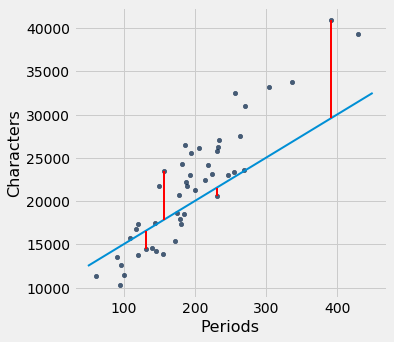

In [47]:
lw_rmse(50, 10000)

In [48]:
lw_mse(50, 10000) ** 0.5

1149128.9307901785

In [49]:
minimize(lw_mse)

array([ 9.91012612e-03, -2.12962247e+01])

In [50]:
slope(little_women, 0, 1)

0.009793884102448892

In [72]:
intercept(little_women, 0, 1)

-17.609166235100787

Regression Diagnostics

In [51]:
dugong = Table.read_table('dugong.csv')
dugong

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [52]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

In [57]:
def plot_residuals(t, label_x, label_y):
    '''pot a scatter diagram and residuals'''
    t.scatter(label_x, label_y, fit_line = True)
    actual = t.column(label_y)
    fitted = linear_fit(t, label_x, label_y)
    residuals = actual - fitted
    print('r', correlation(t, label_x, label_y))
    print('RMSE', np.mean(residuals ** 2) ** 0.5)
    t.select(label_x).with_column('Residual', residuals).scatter(0,1)

r 0.32094989606395924
RMSE 3.388079916395342


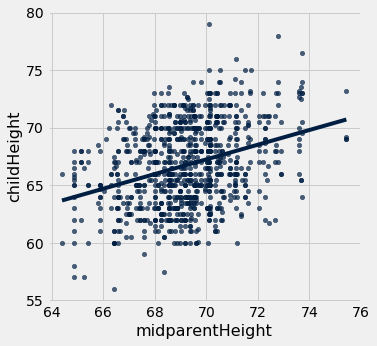

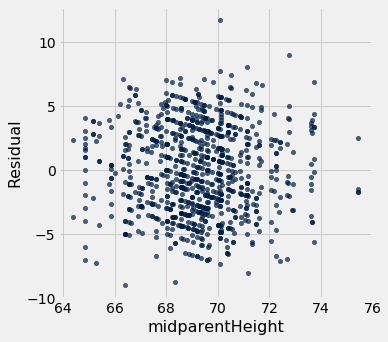

In [58]:
plot_residuals(galton, 'midparentHeight', 'childHeight')

# Regression Model

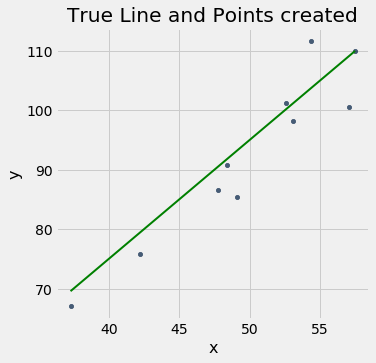

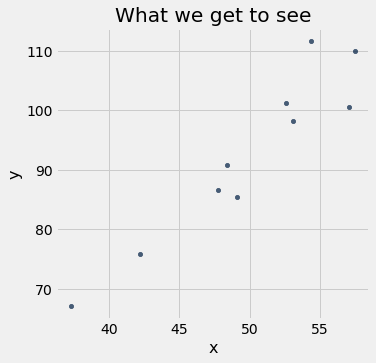

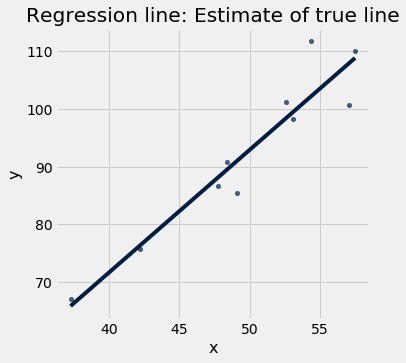

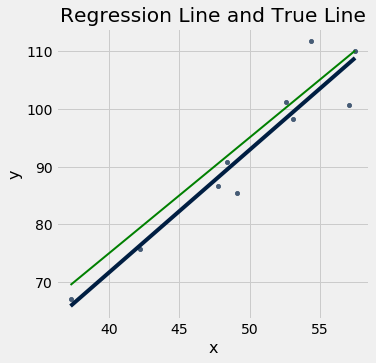

In [63]:
def draw_and_compare(true_slope, true_intercept, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_intercept) + errors
    sample = Table().with_columns('x', x, 'y', y)
    
    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope * xlims + true_intercept, lw = 2, color = 'green')
    plots.title('True Line and Points created')
    
    sample.scatter('x', 'y')
    plots.title('What we get to see')
    
    sample.scatter('x', 'y', fit_line = True)
    plots.title('Regression line: Estimate of true line')
    
    sample.scatter('x', 'y', fit_line = True)
    plots.plot(xlims, true_slope * xlims + true_intercept, lw = 2, color = 'green')
    plots.title('Regression Line and True Line')
    
draw_and_compare(2, -5, 10)


    

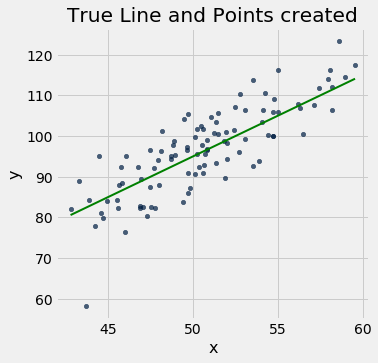

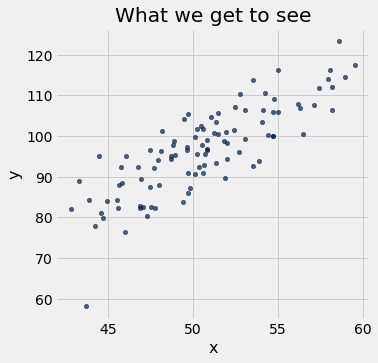

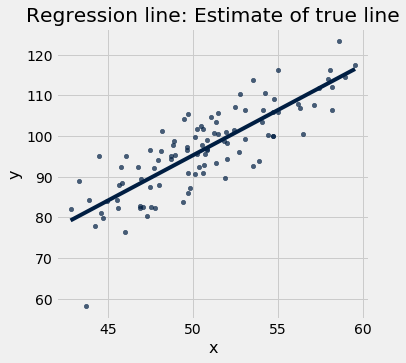

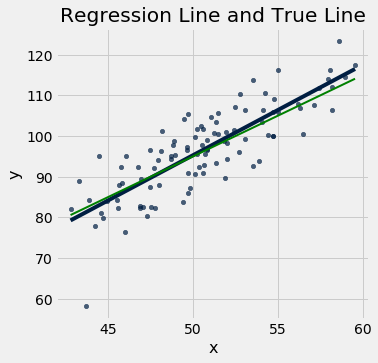

In [64]:
draw_and_compare(2, -5, 100)

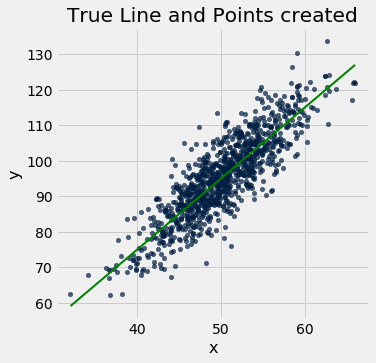

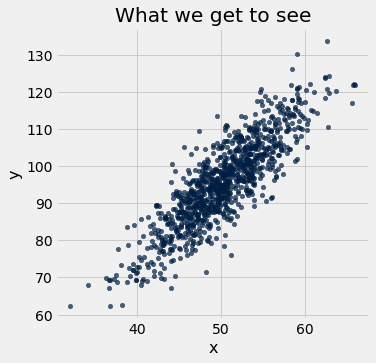

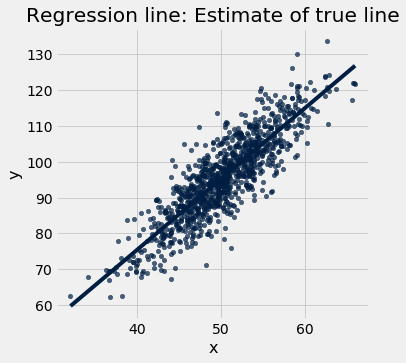

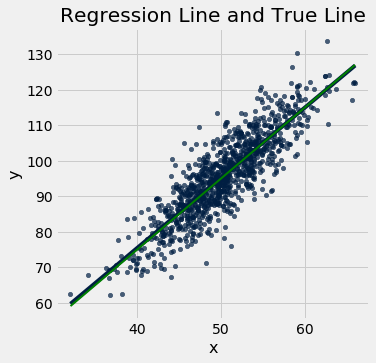

In [65]:
draw_and_compare(2, -5, 1000)

# Prediction Variability

In [67]:
baby = Table.read_table('baby.csv')
baby.show(3)

Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True


r 0.4075427933888511
RMSE 16.730358256655432


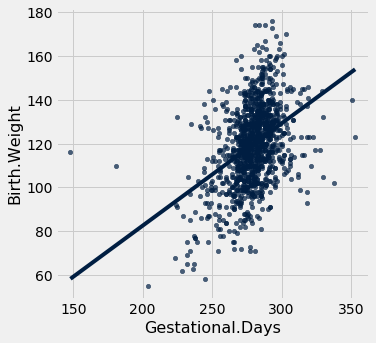

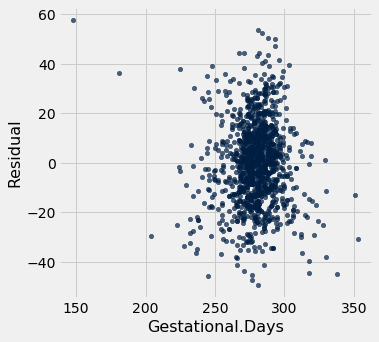

In [69]:
plot_residuals(baby, 'Gestational.Days', 'Birth.Weight')

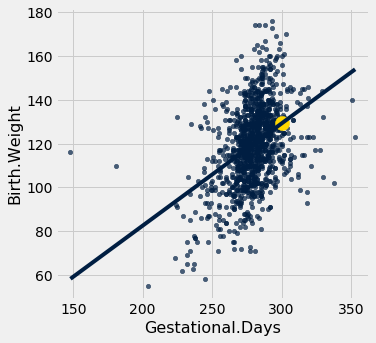

In [70]:
x = 300 #days
a = slope(baby, 'Gestational.Days', 'Birth.Weight')
b = intercept(baby, 'Gestational.Days', 'Birth.Weight')
predicted_y = a * x + b
baby.scatter('Gestational.Days', 'Birth.Weight', fit_line=True)
plots.scatter(300, predicted_y, color='gold', s=200);

In [71]:
predicted_y

129.2129241703143

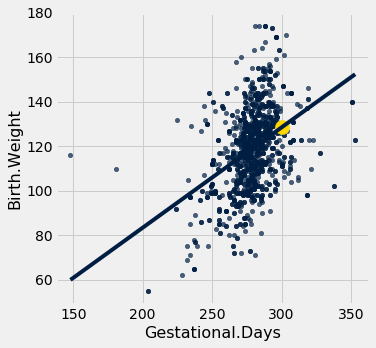

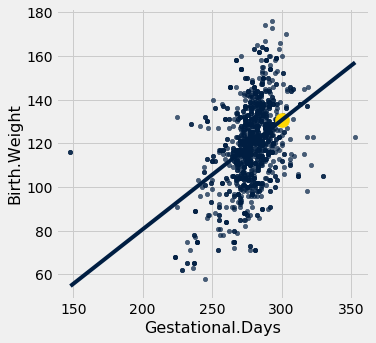

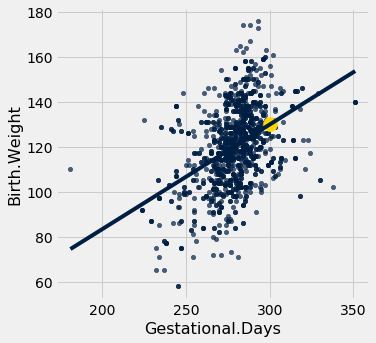

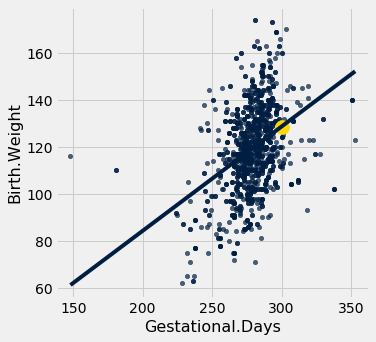

In [73]:
def prediction_at(t, x):
    a = slope(t, 'Gestational.Days', 'Birth.Weight')
    b = intercept(t, 'Gestational.Days', 'Birth.Weight')
    return a * x + b

for i in np.arange(4):
    resample = baby.sample()
    predicted_y = prediction_at(resample, 300)
    resample.scatter('Gestational.Days', 'Birth.Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=200)

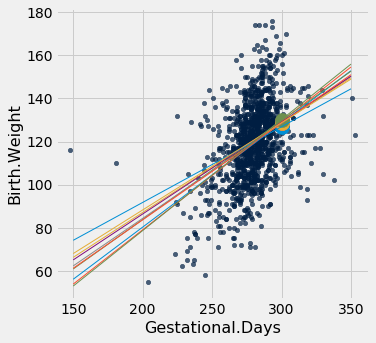

In [74]:
lines = Table(['slope', 'intercept', 'at 150', 'at 300', 'at 350'])

for i in range(10):
    resample = baby.sample()
    a = slope(resample, 'Gestational.Days', 'Birth.Weight')
    b = intercept(resample, 'Gestational.Days', 'Birth.Weight')
    lines.append([a, b, a * 150 + b, a * 300 + b, a * 350 + b])
    
baby.scatter('Gestational.Days', 'Birth.Weight')
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([150, 350], [line.item('at 150'), line.item('at 350')], lw=1)
    plots.scatter(300, line.item('at 300'), s=200)

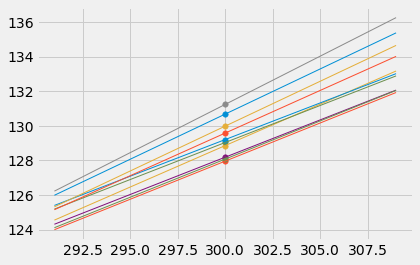

In [76]:
lines = Table(['slope', 'intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = baby.sample()
    a = slope(resample, 'Gestational.Days', 'Birth.Weight')
    b = intercept(resample, 'Gestational.Days', 'Birth.Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])
    
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30)

Approximate 95%-confidence interval for height of true line:
127.28476669806864 131.32202622984568 (width = 4.037259531777039 )


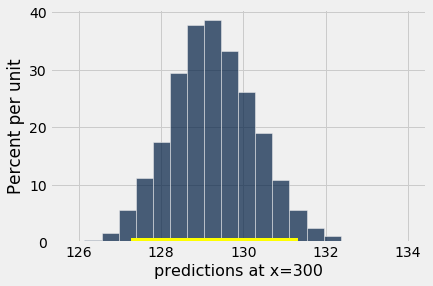

In [77]:
def bootstrap_prediction(table, x, y, new_x, repetitions=5000):

    # Bootstrap resampling
    predictions = []
    for i in np.arange(repetitions):
        resample = table.sample()
        a = slope(resample, x, y)
        b = intercept(resample, x, y)
        predicted_y = a * new_x + b
        predictions.append(predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')')
    
bootstrap_prediction(baby, 'Gestational.Days', 'Birth.Weight', 300)

Approximate 95%-confidence interval for height of true line:
138.86561414351445 147.8881890446279 (width = 9.022574901113444 )


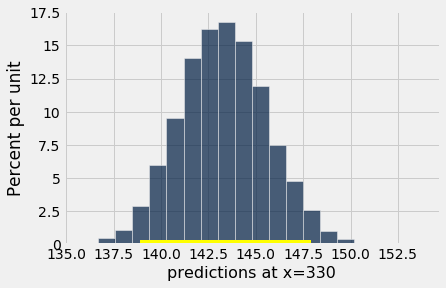

In [78]:
bootstrap_prediction(baby, 'Gestational.Days', 'Birth.Weight', 330)

Approximate 95%-confidence interval for height of true line:
118.89951029312597 120.85168427039486 (width = 1.9521739772688846 )


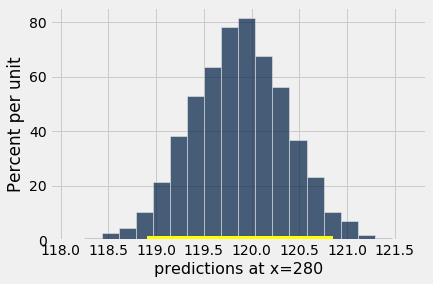

In [79]:
bootstrap_prediction(baby, 'Gestational.Days', 'Birth.Weight', 280)

# Slope Inference

In [81]:
slope(baby, 'Gestational.Days', 'Birth.Weight')

0.4665568769492152

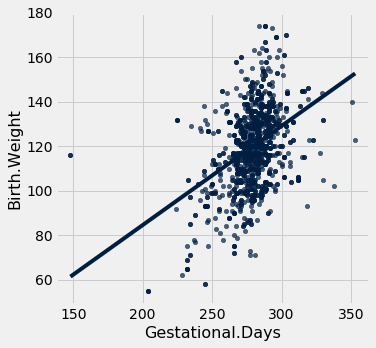

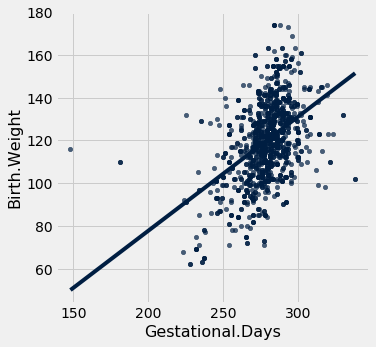

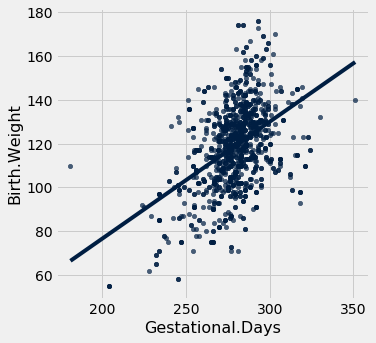

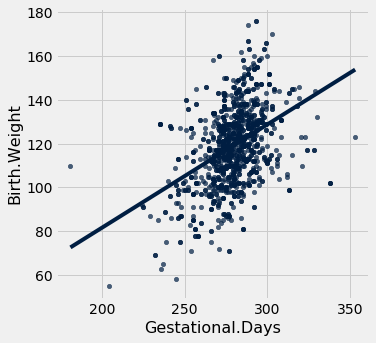

In [82]:
for i in np.arange(4):
    baby.sample().scatter('Gestational.Days', 'Birth.Weight', fit_line=True)

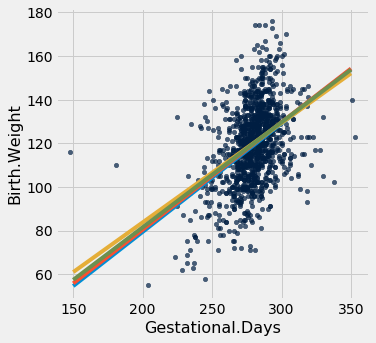

In [83]:
baby.scatter('Gestational.Days', 'Birth.Weight')
for i in np.arange(4):
    resample = baby.sample()
    s = slope(resample, 'Gestational.Days', 'Birth.Weight')
    c = intercept(resample, 'Gestational.Days', 'Birth.Weight')
    xlims = make_array(150, 350)
    plots.plot(xlims, s*xlims + c, lw=4)

In [84]:
baby.num_rows

1174

In [85]:
baby.sample().num_rows

1174

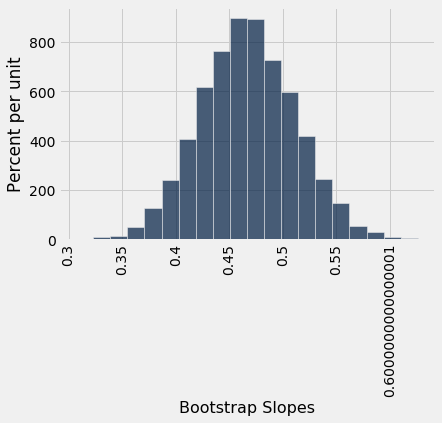

In [86]:
slopes = []
for i in np.arange(5000):
    resample = baby.sample()
    resample_slope = slope(resample, 'Gestational.Days', 'Birth.Weight')
    slopes.append(resample_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

In [87]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
[left, right]

[0.38174788019309597, 0.5550272718859341]

Slope of regression line: -1.1931230373461217
Approximate 95%-confidence interval for the true slope:
-2.251501168115474 -0.14087801175314005


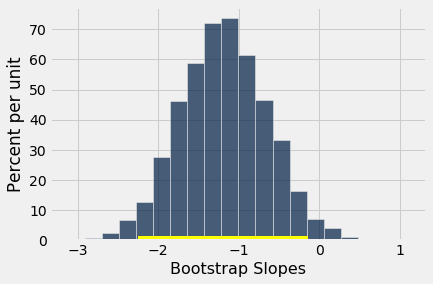

In [88]:
def bootstrap_slope(table, x, y, repetitions=5000):
    
    # Bootstrap resampling
    slopes = []
    for i in np.arange(repetitions):
        resample = table.sample()
        resample_slope = slope(resample, x, y)
        slopes.append(resample_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)
    
bootstrap_slope(baby, 1, 0)

r 0.4075427933888511
RMSE 16.730358256655432


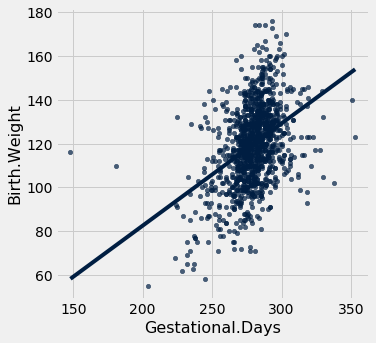

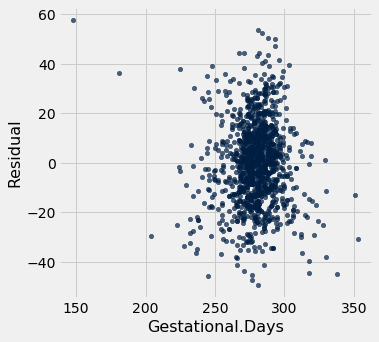

In [91]:
plot_residuals(baby, 2, 1)

Slope of regression line: 0.4665568769492152
Approximate 95%-confidence interval for the true slope:
0.38066148698895924 0.5557751164835015


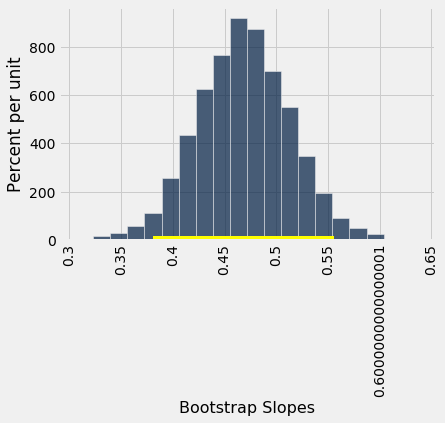

In [90]:
bootstrap_slope(baby, 2, 1)